In [1]:
words=open("names.txt","r").read().splitlines()
print("Total Words",len(words))
print("Max Length",max(len(i) for i in words))
print("Min Length,",min(len(i) for i in words))


Total Words 32033
Max Length 15
Min Length, 2


In [2]:
ltable=set("".join(words))
stable={s:i+1 for i,s in enumerate(sorted(ltable))}
stable["."]=0
stable

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

# Creating Traning Set

In [4]:
import torch
xs=[];ys=[]
for i in words:
    char=["."]+list(i)+["."]
    for w1,w2 in zip(char,char[1:]):
        idx1=stable[w1]
        idx2=stable[w2]
        xs.append(idx1)
        ys.append(idx2)
        
xs=torch.tensor(xs)
ys=torch.tensor(ys)

# One Hot Vector (Encoding)

In [5]:
from torch.nn import functional as f

In [30]:
X=f.one_hot(xs, num_classes=27).float()

W=torch.randn((27,27),requires_grad=True)
print("Shape of X ",X.shape)
print("Shape of W ",W.shape) # (5 X 27) (27 X 27) = (5 X 27)

Shape of X  torch.Size([228146, 27])
Shape of W  torch.Size([27, 27])


# Traning Loop

In [31]:
loss_list=[]
epo=[]

for epoch in range(100):
      
    X=f.one_hot(xs, num_classes=27).float()
    logits=(X@W)
    
    ex=torch.exp(logits)
    
    softop=ex/torch.sum(ex,dim=1,keepdims=True)
    
    loss=-torch.log(softop[torch.arange(len(xs)),ys]).mean()+0.01*(W**2).mean()
    loss_list.append(loss)
    epo.append(epoch)
    
    W.grad=None
    loss.backward()
    W.data+=-50*W.grad

    
   
    print(f"Epochs- {epoch} Loss",loss)
    
    
    

Epochs- 0 Loss tensor(3.6706, grad_fn=<AddBackward0>)
Epochs- 1 Loss tensor(3.3189, grad_fn=<AddBackward0>)
Epochs- 2 Loss tensor(3.1182, grad_fn=<AddBackward0>)
Epochs- 3 Loss tensor(2.9897, grad_fn=<AddBackward0>)
Epochs- 4 Loss tensor(2.8981, grad_fn=<AddBackward0>)
Epochs- 5 Loss tensor(2.8315, grad_fn=<AddBackward0>)
Epochs- 6 Loss tensor(2.7825, grad_fn=<AddBackward0>)
Epochs- 7 Loss tensor(2.7455, grad_fn=<AddBackward0>)
Epochs- 8 Loss tensor(2.7165, grad_fn=<AddBackward0>)
Epochs- 9 Loss tensor(2.6931, grad_fn=<AddBackward0>)
Epochs- 10 Loss tensor(2.6737, grad_fn=<AddBackward0>)
Epochs- 11 Loss tensor(2.6574, grad_fn=<AddBackward0>)
Epochs- 12 Loss tensor(2.6434, grad_fn=<AddBackward0>)
Epochs- 13 Loss tensor(2.6312, grad_fn=<AddBackward0>)
Epochs- 14 Loss tensor(2.6206, grad_fn=<AddBackward0>)
Epochs- 15 Loss tensor(2.6111, grad_fn=<AddBackward0>)
Epochs- 16 Loss tensor(2.6027, grad_fn=<AddBackward0>)
Epochs- 17 Loss tensor(2.5951, grad_fn=<AddBackward0>)
Epochs- 18 Loss tens

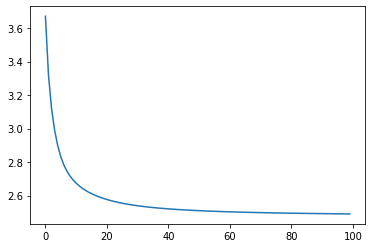

In [32]:
from matplotlib import pyplot as plt
losses=[]
for i in loss_list:
    losses.append(i.detach().numpy())
    
plt.plot(epo,losses)

In [36]:
table=sorted(set("".join(words)))
stoi={s:i+1 for i,s in enumerate(table)}
stoi["."]=0
itos={s:i for i,s in stoi.items()}


In [43]:
# g=torch.Generator().manual_seed(5)

idx=0
names=[]
for i in range(5):
    while True:
#         p=N[idx,:].float()
#         p=p/p.sum()
        
        X=f.one_hot(torch.tensor([idx]), num_classes=27).float()
        logits=(X@W)

        ex=torch.exp(logits)
        softop=ex/torch.sum(ex,dim=1,keepdims=True)
        
        idx=torch.multinomial(softop,num_samples=1,replacement=True,generator=g).item()
        itos[idx]
        names.append(itos[idx])
        if idx==0:
            break
    print("".join(names))
    names.clear()

d.
l.
da.
x.
ecinaral.
